In [20]:
import numpy as np
import matplotlib.pyplot as plt

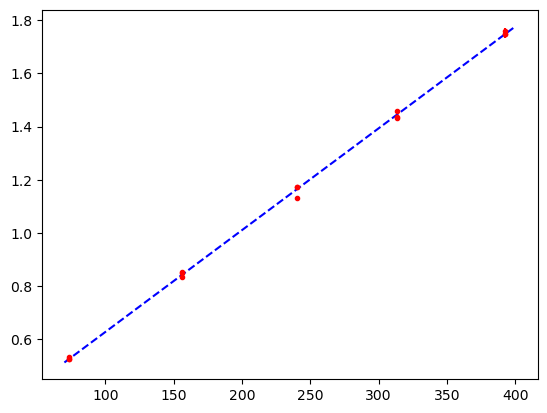

0.0038282042820966264


In [23]:
# Data paths
cm1 = [
    "./Data/calibration mass 1/trial1.csv",
    "./Data/calibration mass 1/trial2.csv",
    "./Data/calibration mass 1/trial3.csv",
]
cm2 = [
    "./Data/calibration mass 2/trial1.csv",
    "./Data/calibration mass 2/trial2.csv",
    "./Data/calibration mass 2/trial3.csv",
]
cm3 = [
    "./Data/calibration mass 3/trial1.csv",
    "./Data/calibration mass 3/trial2.csv",
    "./Data/calibration mass 3/trial3.csv",
]
cm4 = [
    "./Data/calibration mass 4/trial1.csv",
    "./Data/calibration mass 4/trial2.csv",
    "./Data/calibration mass 4/trial3.csv",
]
cm5 = [
    "./Data/calibration mass 5/trial1.csv",
    "./Data/calibration mass 5/trial2.csv",
    "./Data/calibration mass 5/trial3.csv",
]

# Load data
data = [
    cm1t1 := np.loadtxt(cm1[0], delimiter=",", skiprows=7, usecols=[2]),
    cm1t2 := np.loadtxt(cm1[1], delimiter=",", skiprows=7, usecols=[2]),
    cm1t3 := np.loadtxt(cm1[2], delimiter=",", skiprows=7, usecols=[2]),
    cm2t1 := np.loadtxt(cm2[0], delimiter=",", skiprows=7, usecols=[2]),
    cm2t2 := np.loadtxt(cm2[1], delimiter=",", skiprows=7, usecols=[2]),
    cm2t3 := np.loadtxt(cm2[2], delimiter=",", skiprows=7, usecols=[2]),
    cm3t1 := np.loadtxt(cm3[0], delimiter=",", skiprows=7, usecols=[2]),
    cm3t2 := np.loadtxt(cm3[1], delimiter=",", skiprows=7, usecols=[2]),
    cm3t3 := np.loadtxt(cm3[2], delimiter=",", skiprows=7, usecols=[2]),
    cm4t1 := np.loadtxt(cm4[0], delimiter=",", skiprows=7, usecols=[2]),
    cm4t2 := np.loadtxt(cm4[1], delimiter=",", skiprows=7, usecols=[2]),
    cm4t3 := np.loadtxt(cm4[2], delimiter=",", skiprows=7, usecols=[2]),
    cm5t1 := np.loadtxt(cm5[0], delimiter=",", skiprows=7, usecols=[2]),
    cm5t2 := np.loadtxt(cm5[1], delimiter=",", skiprows=7, usecols=[2]),
    cm5t3 := np.loadtxt(cm5[2], delimiter=",", skiprows=7, usecols=[2]),
]


control_masses = [
    73.372,
    82.953,
    84.155,
    73.089,
    78.739,
]

masses = [
    73.372,
    73.372,
    73.372,
    73.372 + 82.953,
    73.372 + 82.953,
    73.372 + 82.953,
    73.372 + 82.953 + 84.155,
    73.372 + 82.953 + 84.155,
    73.372 + 82.953 + 84.155,
    73.372 + 82.953 + 84.155 + 73.089,
    73.372 + 82.953 + 84.155 + 73.089,
    73.372 + 82.953 + 84.155 + 73.089,
    73.372 + 82.953 + 84.155 + 73.089 + 78.739,
    73.372 + 82.953 + 84.155 + 73.089 + 78.739,
    73.372 + 82.953 + 84.155 + 73.089 + 78.739,
]



points = [data[i][2300:].mean() for i in range(len(data))]
errors = [(data[i][2300:].std() * 2) for i in range(len(data))]

(slope, intercept) = np.polyfit(masses, points, 1)
mass = np.linspace(70, 400, 1000)
curve_fit = slope * mass + intercept

plt.errorbar(masses, points, errors, fmt=".r")
plt.plot(mass, curve_fit, "--b")
plt.show()

print(slope)
